# Crypto Data Visualization During COVID-19 Pandemic (2020-2021)

Data bases obtained from https://www.kaggle.com/odins0n/top-50-cryptocurrency-historical-prices?select=Bitcoin.csv

## Importing data for top Crypto coins

In [2]:
#Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('All_combined.csv')


### Understanding data size and column names.

In [4]:
df.columns

Index(['Currency_Name', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.',
       'Change %'],
      dtype='object')

In [5]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,53835.000000,53835.000000,53835.000000,53835.000000,5.383500e+04,53835.000000
mean,779.148311,777.483981,804.782907,747.375428,3.679014e+09,1.510892
std,4778.510372,4769.814321,4931.196267,4586.516445,8.781240e+10,188.307224
min,0.000000,0.000000,0.000000,-6.503000,0.000000e+00,-100.000000
25%,0.297015,0.296703,0.309305,0.280825,1.262050e+05,-2.350000
50%,3.250800,3.237500,3.401000,3.050800,2.070000e+06,0.000000
75%,65.566500,65.416800,68.195000,62.645000,3.988500e+07,2.630000
max,63545.110000,63544.200000,64831.500000,62067.500000,8.574631e+12,42751.340000


In [6]:
df.shape

(53835, 8)

Narrow information to dates after December 31, 2019

In [7]:
df = df[df['Date'] > '2019-12-31']

## Obtain the top 5 Crypto Currencies with Highest average price

In [8]:
df1 = df[df['Currency_Name'].isin(['Bitcoin', 'Ethereum',
         'Maker','Dash', 'Kusama'])]
df1 = df1.groupby(['Currency_Name']).mean().sort_values(by ='Price', ascending = False)
df1.head()

,Price,Open,High,Low,Vol.,Change %
Currency_Name,,,,,,
Bitcoin,24113.078904,24042.595847,24783.798837,23236.103821,5.651271e+05,0.413555
Maker,1380.187558,1374.478721,1455.090233,1297.349751,3.852375e+03,0.658522
Ethereum,1040.858638,1035.602807,1079.344269,988.482093,9.322857e+06,0.704336
Kusama,235.639199,234.804945,248.310688,222.224908,1.667553e+05,1.189212
Dash,127.842126,127.464435,134.221312,120.557458,5.849456e+05,0.658970


Text(0.5, 1.0, 'Top 5 Crypto Currrencies Average Price')

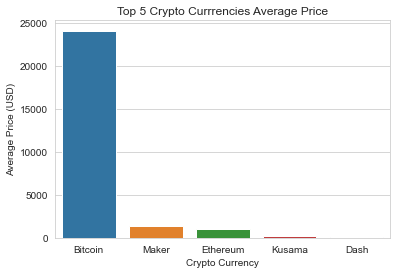

In [9]:
sns.set_style('whitegrid')
ax = sns.barplot( x = df1.index, y = 'Price', data = df1)
plt.ylabel('Average Price (USD)')
plt.xlabel('Crypto Currency')
plt.title('Top 5 Crypto Currrencies Average Price')

## Obtain the top 5 Crypto Currencies with Highest average change %

In [10]:
df2 = df[df['Currency_Name'].isin(['Elrond', 'Aave','Dogecoin','Axie_Infinity', 'Avalanche'])]
df2 = df2.groupby(['Currency_Name']).mean().sort_values(by ='Change %', ascending = False)
df2.head()

,Price,Open,High,Low,Vol.,Change %
Currency_Name,,,,,,
Elrond,72.634235,72.333495,76.049974,69.072653,8.694588e+07,110.042398
Aave,148.898641,148.224042,157.967875,138.781028,2.043793e+05,12.239739
Dogecoin,0.076297,0.075787,0.082615,0.068955,9.483142e+09,11.753704
Axie_Infinity,54.529085,52.925959,57.974041,50.458341,1.192853e+07,4.503235
Avalanche,21.386255,21.214979,22.684774,20.078765,2.746389e+06,1.642305


Text(0.5, 1.0, 'Top 5 Highest Change Crypto Currrencies')

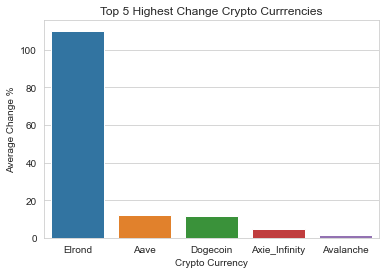

In [11]:
sns.set_style('whitegrid')
ax = sns.barplot( x = df2.index, y = 'Change %', data = df2)
plt.ylabel('Average Change %')
plt.xlabel('Crypto Currency')
plt.title('Top 5 Highest changing Crypto Currrencies')

# Society impact on Crypto

## Covid

De following boxplot show how most of the crypto currencies suffered drastic changes when COVID was announced as a global pandemic compared to previous days. 

In [21]:
df_per = df[df['Date'].isin(['2020-03-10', '2020-03-11','2020-03-12','2020-03-13'])]
df_per.head()

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
770,Aave,2020-03-10,0.0300,0.0300,0.0300,0.0300,111490.0,0.00
771,Aave,2020-03-11,0.0400,0.0300,0.0400,0.0300,2800000.0,38.92
772,Aave,2020-03-12,0.0200,0.0400,0.0400,0.0200,2440000.0,-38.08
773,Aave,2020-03-13,0.0200,0.0200,0.0300,0.0100,775540.0,0.00
1504,Algorand,2020-03-10,0.2819,0.2791,0.2981,0.2725,21370000.0,1.00


<AxesSubplot:title={'center':'Change percentage of Cryptos'}, xlabel='Date', ylabel='Change %'>

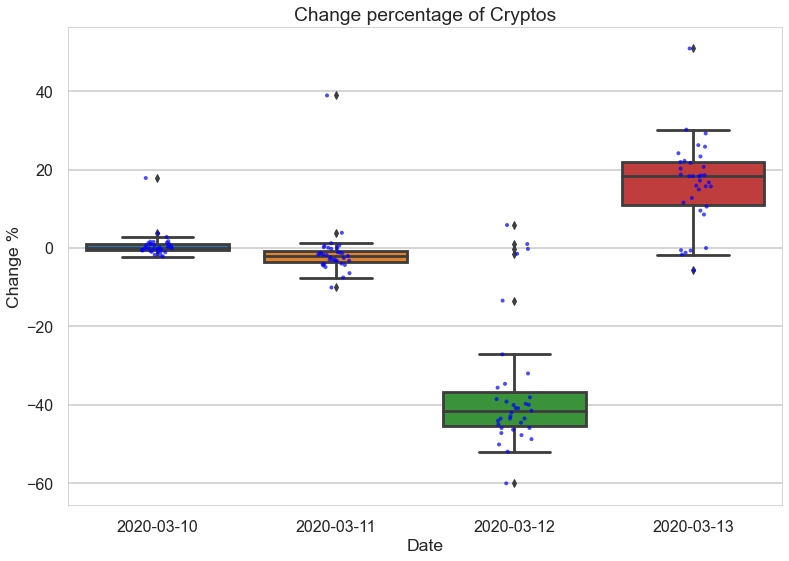

In [35]:
sns.boxplot(x = df_per['Date'], y = df_per['Change %']).set_title('Change percentage of Cryptos')
sns.stripplot(x = df_per['Date'], y = df_per['Change %'], size = 4, color = 'b', alpha = 0.7)

## Bitcoin

Visualize impact on price, change percentage and volume of transactions related to COVID 19 announced as a global pandemic on March 11, 2020.

In [23]:
df_Btc = pd.read_csv('Bitcoin.csv')
df_Btc = df_Btc[(df_Btc['Date'] > '2019-12-31') & (df_Btc['Change %'] <= 100)]
df_Btc.set_index(['Date'], inplace =True)

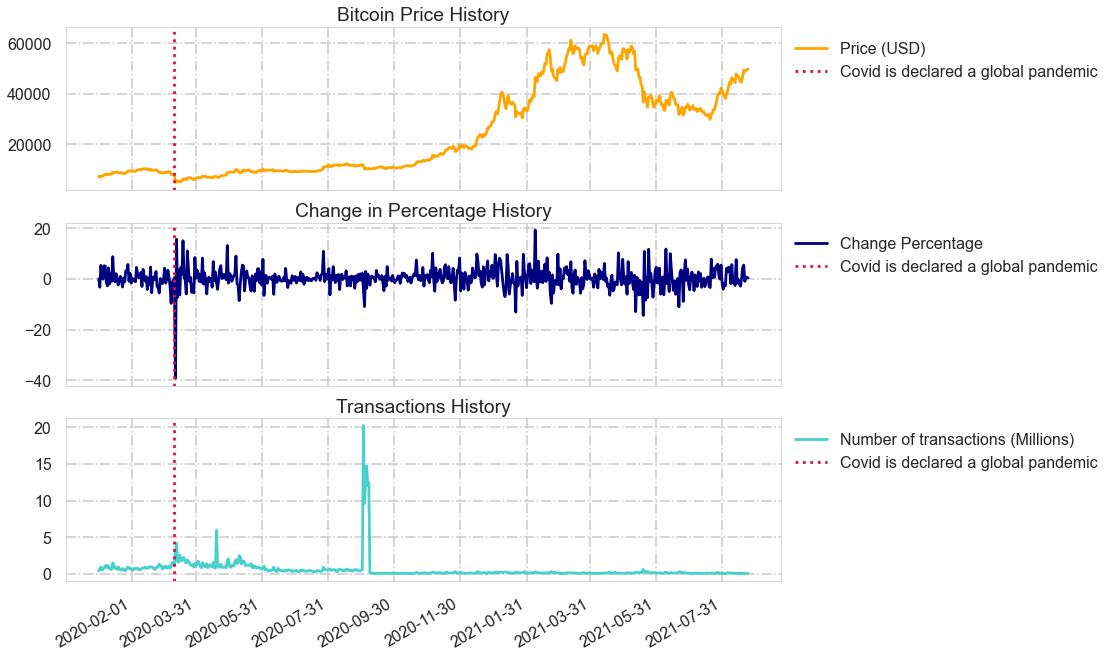

In [24]:
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(df_Btc['Price'], label = 'Price (USD)', color = 'orange')
ax[1].plot(df_Btc['Change %'], label = 'Change Percentage', color = 'navy')
ax[2].plot(df_Btc['Vol.']/(10**6), label = 'Number of transactions (Millions)', color = 'mediumturquoise')

fmt_half_year = mdates.MonthLocator(interval=2)

ax[0].xaxis.set_major_locator(fmt_half_year)
#ax[1].xaxis.set_major_locator(fmt_half_year)
#ax[2].xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax[0].xaxis.set_minor_locator(fmt_month)
#ax[1].xaxis.set_minor_locator(fmt_month)
#ax[2].xaxis.set_minor_locator(fmt_month)


ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')
ax[2].grid(True, linestyle='-.')

ax[0].set_title('Bitcoin Price History')
ax[1].set_title('Change in Percentage History')
ax[2].set_title('Transactions History')

ax[0].axvline('2020-03-11', color = 'crimson', label = 'Covid is declared a global pandemic', linestyle=':')
ax[1].axvline('2020-03-11', color = 'crimson', label = 'Covid is declared a global pandemic', linestyle=':')
ax[2].axvline('2020-03-11', color = 'crimson', label = 'Covid is declared a global pandemic', linestyle=':')

fig.autofmt_xdate()
ax[0].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)
ax[1].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)
ax[2].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)

plt.subplots_adjust(bottom=0.005)
plt.show()

Visualize impact on price and change percentage related to Tesla buying $1.6 billion USD in Bitcoin on February 8, 2021.

In [25]:
df_Btc1 = df_Btc.sort_values(by ='Vol.', ascending = False)
df_Btc1.head()

,SNo,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2020-09-02,3700,11413.3,11914.4,11947.5,11244.9,20260000.0,-4.21
2020-09-05,3703,10092.2,10472.3,10558.7,9897.8,14720000.0,-3.63
2020-09-04,3702,10472.5,10168.7,10614.2,9960.3,12500000.0,2.99
2020-09-07,3705,10376.9,10296.4,10400.9,9887.0,12400000.0,0.78
2020-09-06,3704,10296.4,10092.2,10337.7,10004.7,12120000.0,2.02


In [26]:
df_Btc = pd.read_csv('Bitcoin.csv')
df_Btc = df_Btc[(df_Btc['Date'] > '2019-12-31') & (df_Btc['Change %'] <= 100)]
df_Btc.set_index(['Date'], inplace =True)

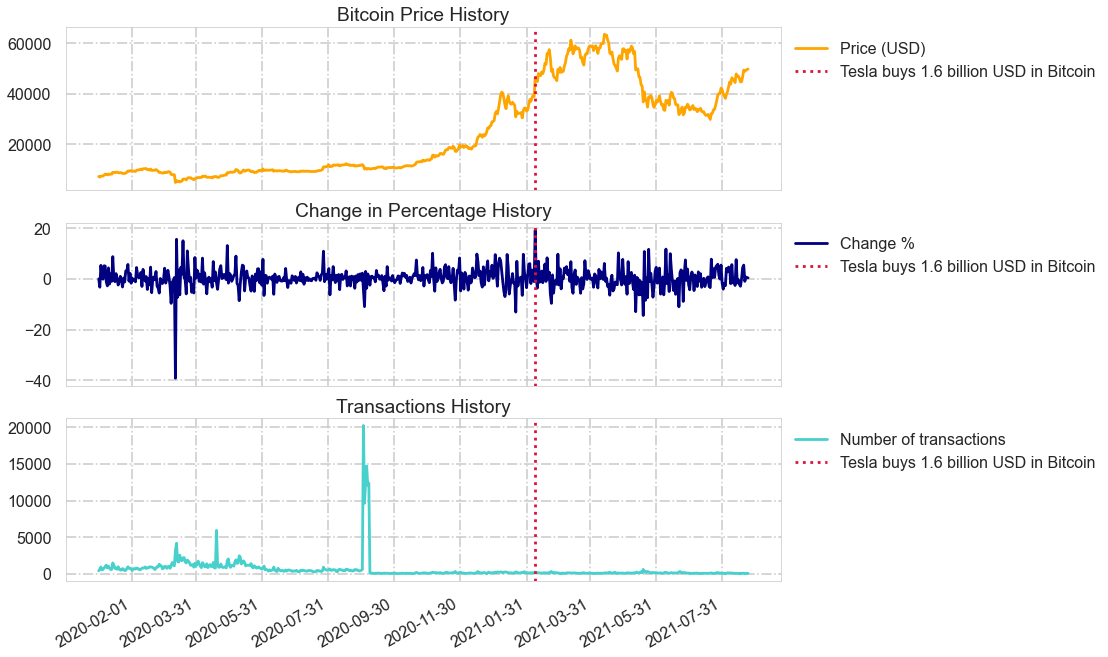

In [27]:
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(df_Btc['Price'], label = 'Price (USD)', color = 'orange')
ax[1].plot(df_Btc['Change %'], label = 'Change %', color = 'navy')
ax[2].plot(df_Btc['Vol.']/(10**3), label = 'Number of transactions', color = 'mediumturquoise')

fmt_half_year = mdates.MonthLocator(interval=2)

ax[0].xaxis.set_major_locator(fmt_half_year)
#ax[1].xaxis.set_major_locator(fmt_half_year)
#ax[2].xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax[0].xaxis.set_minor_locator(fmt_month)
#ax[1].xaxis.set_minor_locator(fmt_month)
#ax[2].xaxis.set_minor_locator(fmt_month)


ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')
ax[2].grid(True, linestyle='-.')

ax[0].set_title('Bitcoin Price History')
ax[1].set_title('Change in Percentage History')
ax[2].set_title('Transactions History')

ax[0].axvline('2021-02-08', color = 'crimson', label = 'Tesla buys 1.6 billion USD in Bitcoin', linestyle=':')
ax[1].axvline('2021-02-08', color = 'crimson', label = 'Tesla buys 1.6 billion USD in Bitcoin', linestyle=':')
ax[2].axvline('2021-02-08', color = 'crimson', label = 'Tesla buys 1.6 billion USD in Bitcoin', linestyle=':')

fig.autofmt_xdate()
ax[0].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)
ax[1].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)
ax[2].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)

plt.subplots_adjust(bottom=0.005)
plt.show()

## DogeCoin

Visualize impact on price, change percentage and volume of transactions related to Elon Musk's Tweets starting on April 1, 2021.

In [28]:
df_Doge = pd.read_csv('Dogecoin.csv')
df_Doge = df_Doge[(df_Doge['Date'] > '2019-12-31') & (df_Doge['Change %'] <= 100)]
df_Doge.set_index(['Date'], inplace =True)
df_Doge.head()

,SNo,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2020-01-01,943,0.002040,0.002015,0.002056,0.002004,1.440000e+09,1.24
2020-01-02,944,0.001999,0.002040,0.002051,0.001991,1.860000e+09,-1.98
2020-01-03,945,0.002042,0.001999,0.002265,0.001989,1.690000e+09,2.14
2020-01-04,946,0.002307,0.002042,0.002318,0.002041,1.550000e+09,12.99
2020-01-05,947,0.002080,0.002307,0.002336,0.002076,1.570000e+09,-9.86


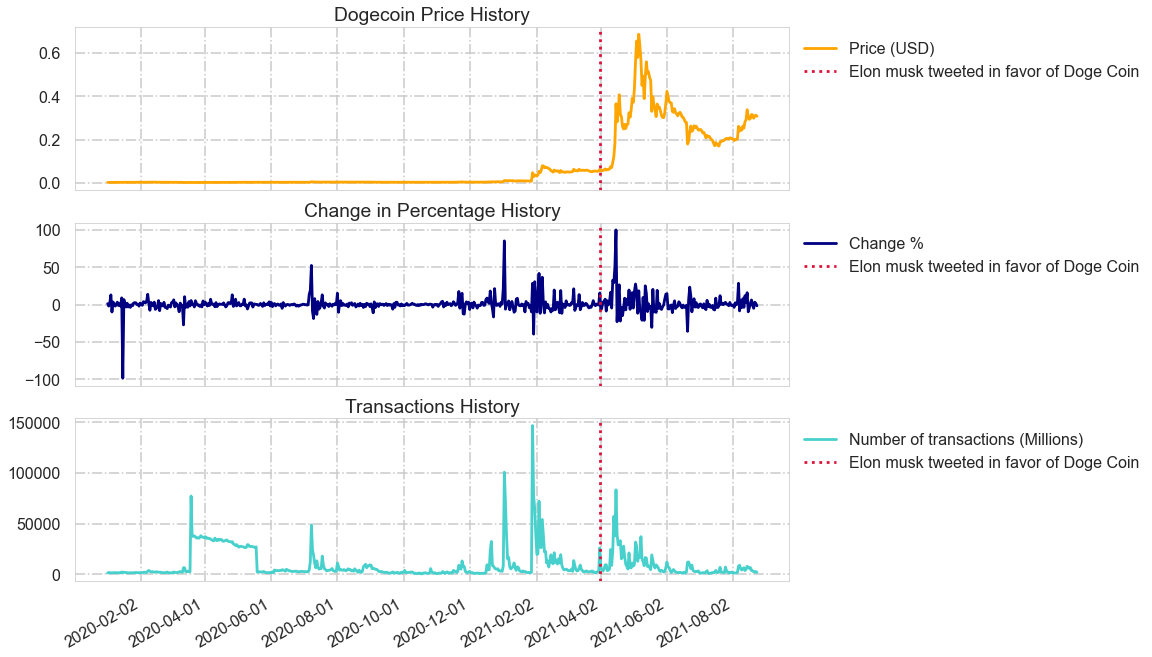

In [29]:
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(df_Doge['Price'], label = 'Price (USD)', color = 'orange')
ax[1].plot(df_Doge['Change %'], label = 'Change %', color = 'navy')
ax[2].plot(df_Doge['Vol.']/(10**6), label = 'Number of transactions (Millions)', color = 'mediumturquoise')

fmt_half_year = mdates.MonthLocator(interval=2)

ax[0].xaxis.set_major_locator(fmt_half_year)
#ax[1].xaxis.set_major_locator(fmt_half_year)
#ax[2].xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax[0].xaxis.set_minor_locator(fmt_month)
#ax[1].xaxis.set_minor_locator(fmt_month)
#ax[2].xaxis.set_minor_locator(fmt_month)


ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')
ax[2].grid(True, linestyle='-.')

ax[0].set_title('Dogecoin Price History')
ax[1].set_title('Change in Percentage History')
ax[2].set_title('Transactions History')

ax[0].axvline('2021-04-01', color = 'crimson', label = 'Elon musk tweeted in favor of Doge Coin', linestyle=':')
ax[1].axvline('2021-04-01', color = 'crimson', label = 'Elon musk tweeted in favor of Doge Coin', linestyle=':')
ax[2].axvline('2021-04-01', color = 'crimson', label = 'Elon musk tweeted in favor of Doge Coin', linestyle=':')

fig.autofmt_xdate()
ax[0].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)
ax[1].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)
ax[2].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)

plt.subplots_adjust(bottom=0.005)
plt.show()

## Ethereum

Visualize impact on price, change percentage and volume of transactions related to release of RTX 30 series GPUs on August 17, 2020.

In [30]:
df_Et = pd.read_csv('Ethereum.csv')
df_Et = df_Et[(df_Et['Date'] > '2019-12-31') & (df_Et['Change %'] <= 100)]
df_Et.set_index(['Date'], inplace =True)
df_Et.head()

,SNo,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2020-01-01,1393,130.75,129.21,132.97,128.81,10350000.0,1.19
2020-01-02,1394,127.19,130.75,130.77,126.74,11450000.0,-2.72
2020-01-03,1395,134.27,127.19,134.86,126.05,15670000.0,5.56
2020-01-04,1396,134.33,134.30,135.57,132.76,11160000.0,0.04
2020-01-05,1397,135.59,134.32,138.33,134.32,12190000.0,0.94


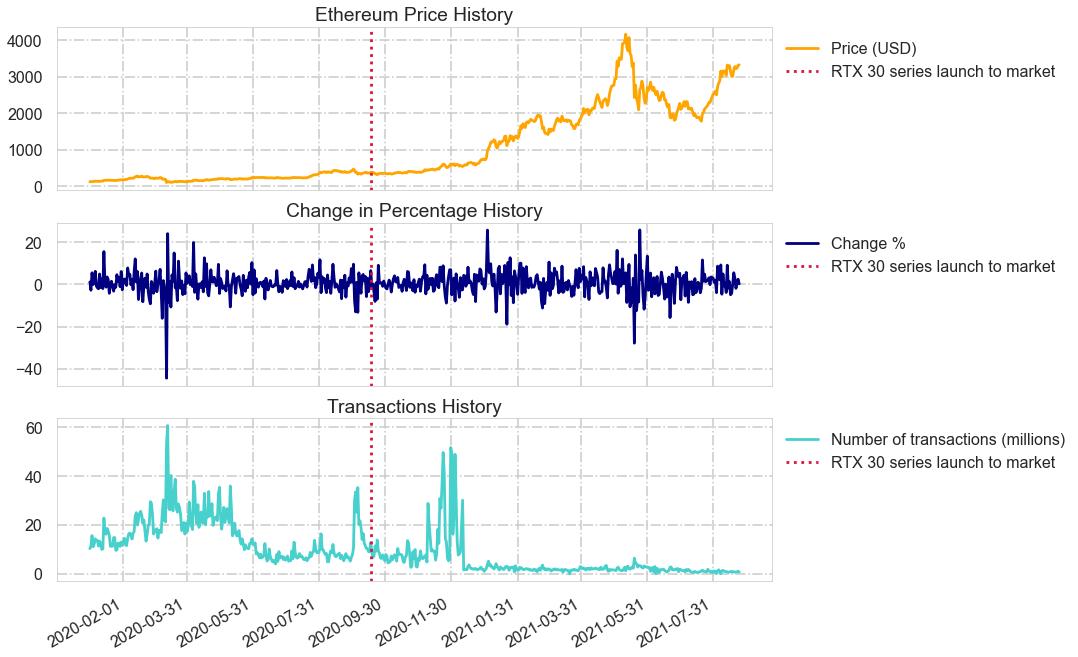

In [31]:
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(df_Et['Price'], label = 'Price (USD)', color = 'orange')
ax[1].plot(df_Et['Change %'], label = 'Change %', color = 'navy')
ax[2].plot(df_Et['Vol.']/(10**6), label = 'Number of transactions (millions)', color = 'mediumturquoise')

fmt_half_year = mdates.MonthLocator(interval=2)

ax[0].xaxis.set_major_locator(fmt_half_year)
#ax[1].xaxis.set_major_locator(fmt_half_year)
#ax[2].xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax[0].xaxis.set_minor_locator(fmt_month)
#ax[1].xaxis.set_minor_locator(fmt_month)
#ax[2].xaxis.set_minor_locator(fmt_month)


ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')
ax[2].grid(True, linestyle='-.')

ax[0].set_title('Ethereum Price History')
ax[1].set_title('Change in Percentage History')
ax[2].set_title('Transactions History')

ax[0].axvline('2020-09-17', color = 'crimson', label = 'RTX 30 series launch to market', linestyle=':')
ax[1].axvline('2020-09-17', color = 'crimson', label = 'RTX 30 series launch to market', linestyle=':')
ax[2].axvline('2020-09-17', color = 'crimson', label = 'RTX 30 series launch to market', linestyle=':')

fig.autofmt_xdate()
ax[0].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)
ax[1].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)
ax[2].legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon=False)

plt.subplots_adjust(bottom=0.005)
plt.show()

# Covid new cases compared to Bitcoin price

In [32]:
df_Cov = pd.read_csv('owid-covid-data.csv')
df_Cov = df_Cov[['location', 'date', 'new_cases']]
df_Cov['date'] = pd.to_datetime(df_Cov['date'], format = '%Y-%m-%d')
df_Cov = df_Cov[df_Cov['location'] == 'World']
df_Cov = df_Cov[df_Cov['date']<= '2021-08-24']
df_Cov.tail()

,location,date,new_cases
124850,World,2021-08-20,789936.0
124851,World,2021-08-21,539275.0
124852,World,2021-08-22,446092.0
124853,World,2021-08-23,705064.0
124854,World,2021-08-24,686389.0


In [33]:
df_Btc = pd.read_csv('Bitcoin.csv')
df_Btc = df_Btc[['Date','Price']]
df_Btc['Date'] = pd.to_datetime(df_Btc['Date'], format = '%Y-%m-%d')
df_Btc = df_Btc[df_Btc['Date'] >= '2020-01-22']
df_Btc.tail()

,Date,Price
4051,2021-08-20,49324.0
4052,2021-08-21,48875.8
4053,2021-08-22,49254.5
4054,2021-08-23,49539.7
4055,2021-08-24,49768.2


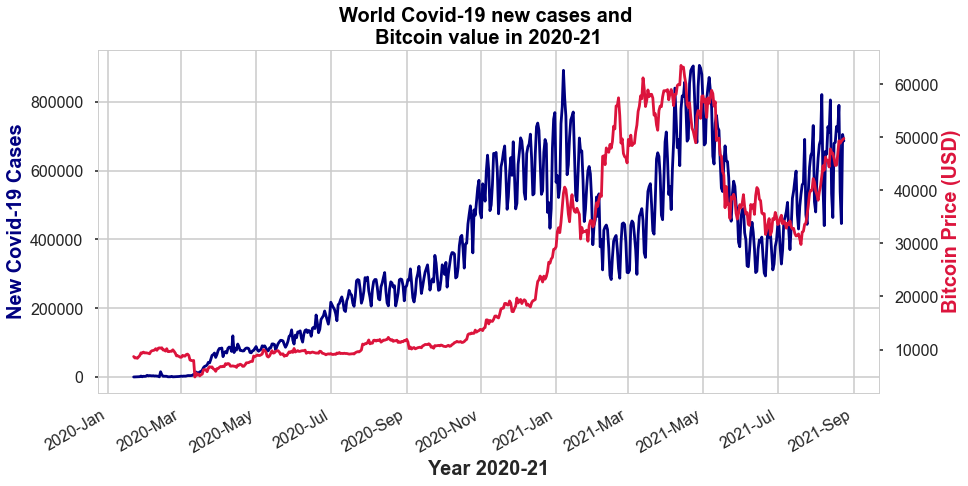

In [34]:
#Create the graph by using the two datasets
#set the size of the graph
fig, ax1 = plt.subplots(figsize = (14,7))

#set two axes instead of one
ax2 = ax1.twinx()

#use the first dataset of covid
ax1.plot(df_Cov['date'], df_Cov['new_cases'], 'navy')
# use the second dataset of Bitcoin prices
ax2.plot(df_Btc	['Date'], df_Btc['Price'], 'crimson')

# set the X axis label
ax1.set_xlabel('Year 2020-21', size = 20, fontweight = 'bold' )

#set the Y axis label for each side to the dataset ax1 for covid ax2 for stoxk prices
ax1.set_ylabel('New Covid-19 Cases', color = 'navy', size =20, fontweight = 'bold')
ax2.set_ylabel('Bitcoin Price (USD)', color = 'crimson', size =20, fontweight = 'bold')

#set your title
plt.title('World Covid-19 new cases and \nBitcoin value in 2020-21', size = 20, color = 'k', fontweight = 'bold')
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
fig.autofmt_xdate()
plt.savefig('Covid-Bitcoin_.jpeg', dpi=300)
plt.show()